# 1.对目标函数进行优化

In [1]:
import numpy as np
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [2]:
def rosen_hess(x):
    #hessian矩阵
    #返回对象是个二维数组
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

In [10]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

res = minimize(rosen, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


array([1., 1., 1., 1., 1.])

# 2.常微分方程求解

In [8]:
from sympy import *
f = symbols('f', cls=Function)
x = symbols('x')
eq = Eq(f(x).diff(x,1)+f(x)+f(x)**2, 0)
print(dsolve(eq, f(x)))
C1 = symbols('C1')
eqr = -C1/(C1 - exp(x))
eqr1 = eqr.subs(x, 0)
print(solveset(eqr1 - 1, C1))
eqr2 = eqr.subs(C1, 1/2)


Eq(f(x), -C1/(C1 - exp(x)))
{1/2}


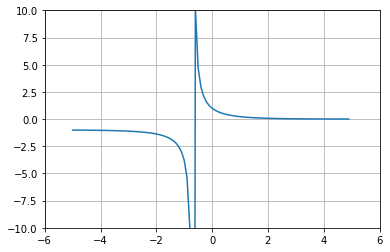

In [9]:
# 画图
import matplotlib.pyplot as plt
import numpy as np
x_1 = np.arange(-5, 5, 0.1)
y_1 = [-0.5/(0.5 - exp(x)) for x in x_1]
plt.plot(x_1, y_1)
plt.axis([-6,6,-10,10])
plt.grid()
plt.show()